Correlation test passed!
Max difference = 1.11022302463e-16 <= threshold = 1e-10
Variable Name       My Value    Library Value    Difference
---------------  -----------  ---------------  ------------
m                -241.77          -241.77       0
b                 -39.6638         -39.6638     0
r                  -0.915223        -0.915223   1.11022e-16
r^2                 0.837634         0.837634   1.11022e-16

Correlation test passed!
Max difference = 0.0 <= threshold = 1e-10
Variable Name      My Value    Library Value    Difference
---------------  ----------  ---------------  ------------
m                 78.0973          78.0973               0
b                 16.4405          16.4405               0
r                  0.735215         0.735215             0
r^2                0.540541         0.540541             0



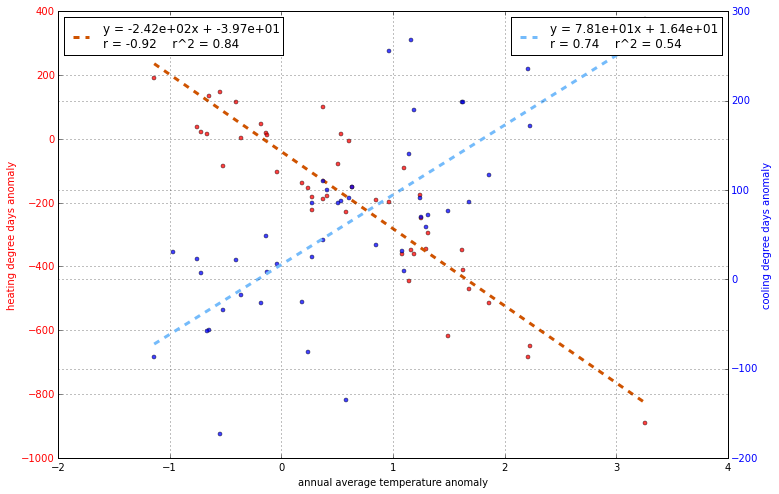

Correlation test passed!
Max difference = 3.33066907388e-16 <= threshold = 1e-10
Variable Name      My Value    Library Value    Difference
---------------  ----------  ---------------  ------------
m                  0.70138          0.70138    3.33067e-16
b                  0.585891         0.585891   3.33067e-16
r                  0.790753         0.790753   1.11022e-16
r^2                0.62529          0.62529    2.22045e-16



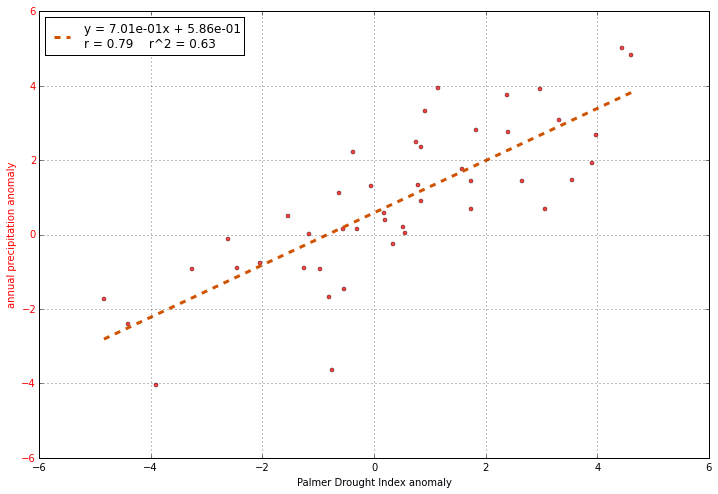

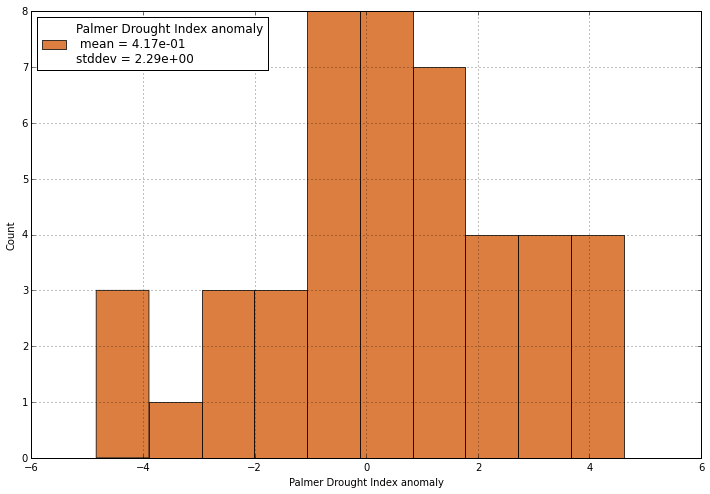

In [4]:
import stats
%matplotlib inline
stats.scatter_plot('temperature', 'heating', 'cooling')
stats.scatter_plot('Palmer', 'precip')
stats.histogram('Palmer')

In [ ]:
stats.main()

In [ ]:
stats.scatter_plot('temperature', 'heating')

In [ ]:
from stats import *
%matplotlib inline

MARKER_COLORS = ('#CF5300', '#74BBFB')
LINE_COLORS = ('red', 'blue')
LEGEND_LOCATIONS = ('upper left', 'upper right')

def draw_scatter(x_name, y_name, data_dict, axes, second=False):
    index = 0 + int(second)
    if second:
        axes = axes.twinx()
    
    x_series = data_dict[x_name]
    y_series = data_dict[y_name]
    m, b, r, r_squared = linear_regression(x_series, y_series)
    
    axes.plot(x_series, y_series, 'o', color=MARKER_COLORS[index], markersize=5, alpha=0.75)
    
    regression_label = 'y = {m:.2e}x + {b:.2e}\nr = {r:.2f}    r^2 = {r2:.2f}'\
        .format(m=m, b=b, r=r, r2=r_squared)
    x_for_regression = numpy.linspace(min(x_series), max(x_series), len(x_series))
    axes.plot(x_for_regression, m * numpy.array(x_for_regression) + b, '--', color=LINE_COLORS[index], label=regression_label, linewidth=3)
    
    axes.set_xlabel(x_name)
    axes.set_ylabel(y_name, color=LINE_COLORS[index])
    axes.legend(loc=LEGEND_LOCATIONS[index])
    axes.grid(True)
    
    for tick in axes.get_yticklabels():
        tick.set_color(LINE_COLORS[index])
    

def scatter_plot(x_series_name, y_series_name, second_y_series_name=None, all_data=DEFAULT_DATA):
    if not plot:
        print 'Scatter plot required matplotlib to run. Aborting...'
        return

    names_tuple, data_dict = process_data_to_dict(DEFAULT_DATA)
    x_name = get_name_from_user(x_series_name, names_tuple)
    y_name = get_name_from_user(y_series_name, names_tuple)
    
    figure, axes = plot.subplots()
    figure.set_size_inches(12,8)
    figure.set_dpi(400)
    
    draw_scatter(x_name, y_name, data_dict, axes)
    if second_y_series_name:
        second_y_name = get_name_from_user(second_y_series_name, names_tuple)        
        if second_y_name != y_name:
            draw_scatter(x_name, second_y_name, data_dict, axes, True)
        
    plot.show()
    
def histogram(series_name, all_data=DEFAULT_DATA):
    plot.figure(figsize = (12,8), dpi = 400)
    if not plot:
        print 'Scatter plot required matplotlib to run. Aborting...'
        return

    names_tuple, data_dict = process_data_to_dict(DEFAULT_DATA)

    name = get_name_from_user(series_name, names_tuple)
    series = data_dict[name]

    plot.hist([series], color=['#CF5300'], alpha=0.75)
    series_mean = mean(series)
    series_stddev = standard_deviation(series)
    label = '{name}\n mean = {mean:.2e}\nstddev = {stddev:.2e}'\
        .format(name=name, mean=series_mean, stddev=series_stddev)

    plot.legend([label], loc='best')
    plot.xlabel(name)
    plot.ylabel('Count')
    plot.grid(True)
    plot.show()



In [ ]:
#     y_axis.plot(x_series, y_series, 'o', color='red', markersize=6, alpha=0.75)
#     regression_label = 'y = {m:.2e}x + {b:.2e}\nr = {r:.2f}    r^2 = {r2:.2f}'\
#         .format(m=m, b=b, r=r, r2=r_squared)
#     x_for_regression = numpy.linspace(min(x_series), max(x_series), len(x_series))
#     y_axis.plot(x_for_regression, m * numpy.array(x_for_regression) + b, '--', color='#CF5300', label=regression_label, linewidth=3)
#     y_axis.set_xlabel(x_name)
#     y_axis.set_ylabel(y_name, color='red')
#     for tick in y_axis.get_yticklabels():
#         tick.set_color('red')
#     y_axis.legend(loc='upper left')
    
#     if second_y_series_name:
#         second_y_name = get_name_from_user(second_y_series_name, names_tuple)
        
#         if second_y_name != y_name:
#             second_y_series = data_dict[second_y_name]    
#             m2, b2, r2, r_squared2 = linear_regression(x_series, second_y_series)
#             second_y_axis = y_axis.twinx()

#             second_y_axis.plot(x_series, second_y_series, 'o', color='blue', markersize=4, alpha=0.75)
#             regression_label2 = 'y = {m:.2e}x + {b:.2e}\nr = {r:.2f}    r^2 = {r2:.2f}'\
#                 .format(m=m2, b=b2, r=r2, r2=r_squared2)
#             second_y_axis.plot(x_for_regression, m2 * numpy.array(x_for_regression) + b2, '--', color=, label=regression_label2, linewidth=3)
#             second_y_axis.set_ylabel(second_y_name, color='blue')
#             for tick in second_y_axis.get_yticklabels():
#                 tick.set_color('blue')
#             second_y_axis.legend(loc='upper right')
    
    #plot.legend(loc = 'best', prop={'size':10})

In [26]:
import sklearn
from sklearn.cluster import KMeans
est = KMeans(n_clusters = 3)
data = stats.DEFAULT_DATA[1:]
est.fit(data)
arr = est.predict(data)
print len(arr), len(data)
for i in xrange(len(arr)):
    print arr[i], data[i]


45 45
2 (-0.41, -0.24, 0.34, 22, 115)
2 (-0.36, 0.39, 0.2, -18, 2)
2 (-0.65, 1.76, 1.58, -57, 136)
1 (0.27, 5.02, 4.45, 25, -223)
1 (0.24, 0.68, 3.07, -81, -154)
1 (-0.52, 3.09, 3.32, -34, -86)
2 (-0.55, -3.63, -0.75, -173, 148)
2 (0.53, 0.5, -1.55, 88, 14)
2 (-0.97, 0.2, 0.52, 31, 360)
2 (-1.14, 2.81, 1.83, -87, 192)
2 (0.37, -1.67, -0.8, 110, 101)
1 (1.1, 0.02, -1.16, 9, -92)
2 (-0.67, 3.92, 2.97, -58, 17)
2 (-0.14, 4.82, 4.61, 48, 19)
1 (-0.04, 1.46, 3.55, 17, -105)
2 (-0.72, 0.03, 0.56, 7, 23)
1 (1.3, 1.44, 1.74, 59, -344)
1 (1.31, -0.93, -0.97, 72, -296)
2 (0.61, -4.04, -3.91, 91, -8)
2 (-0.18, -0.89, -1.25, -27, 47)
0 (1.49, 2.23, -0.37, 76, -619)
0 (1.14, 2.5, 0.75, 140, -445)
1 (0.58, 1.32, 0.79, -135, -228)
2 (-0.76, 2.68, 3.97, 23, 38)
1 (0.85, 0.68, 1.74, 38, -191)
1 (0.63, 2.75, 2.4, 103, -150)
2 (-0.13, 3.76, 2.39, 8, 13)
1 (0.18, 1.92, 3.9, -25, -138)
0 (2.21, 3.95, 1.15, 236, -684)
0 (1.86, -1.47, -0.54, 117, -516)
1 (1.25, -1.72, -4.84, 70, -247)
0 (1.68, -0.92, -3.27, 